#                                           MACHINE LEARNING - MINI PROJECT

TOPIC - BREAST CANCER PREDICTION USING: Features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

Attribute Information:
1.)ID number.
2.)Diagnosis (M = malignant, B = benign)
3.)Ten real-valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

In [2]:
#importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
#import and read the dataset 

can_df = pd.read_csv(r"C:\Users\skp18\Downloads\archive (5)\data.csv")

In [4]:
#checking the dimensions of the dataset 
print(f' Number of rows = {can_df.shape[0]} \n Number of columns = {can_df.shape[1]}')

 Number of rows = 569 
 Number of columns = 33


In [5]:
#displaying first few and last few valeus in the dataset 

can_df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [6]:
can_df.tail(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
559  925291         B        11.51         23.93           74.52      403.5   
560  925292         B        14.05         27.15           91.38      600.4   
561  925311         B        11.20         29.37           70.67      386.0   
562  925622         M        15.22         30.62          103.40      716.9   
563  926125         M        20.92         25.09          143.00     1347.0   
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
559          0.09261           0.10210         0.11120              0.04105   
560          0.09929           0.11260         0.04462              0.04304   
561          0.07449           0.03558         0.00000              0.00000   
562          0.10480           0.20870         0.25500              0.09429   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
559  ...          37.16            82.28       474.2           0.12980   
560  ...          33.17           100.20       706.7           0.12410   
561  ...          38.30            75.19       439.6           0.09267   
562  ...          42.79           128.70       915.0           0.14170   
563  ...          29.41           179.10      1819.0           0.14070   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
559            0.25170           0.3630               0.09653          0.2112   
560            0.22640           0.1326               0.10480          0.2250   
561            0.05494           0.0000               0.00000          0.1566   
562            0.79170           1.1700               0.23560          0.4089   
563            0.41860           0.6599               0.25420          0.2929   
564            0.21130           0.4107               0.22160          0.2060   
565            0.19220           0.3215               0.16280          0.2572   
566            0.30940           0.3403               0.14180          0.2218   
567            0.86810           0.9387               0.26500          0.4087   
568            0.06444           0.0000               0.00000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
559                  0.08732          NaN  
560                  0.08321          NaN  
561                  0.05905          NaN  
562                  0.14090          NaN  
563                  0.09873          NaN  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[10 rows x 33 columns]

In [7]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
can_df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

From the information about the dataset it can be observed that 31 colums have float data type , ID column is integer, and Diagnosis column is of object type. Column 32 is unnamed. 

In [9]:
#checking for missing values 

percentage_missing = (can_df.isnull().sum() / len(can_df)) * 100

print(percentage_missing)


id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [10]:
percentage_missing2 = (can_df.isna().sum() / len(can_df)) * 100

print(percentage_missing2)

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

As observed from the output , the unnamed column has only missing values.Hence it would be better to drop this column from the dataset altogether.

In [11]:
#dropping columns ID and Unnamed column(unnamed:32 has only missing values and ID does not affect the final result)

can_df2 = can_df.drop(columns = ['id', 'Unnamed: 32'])
print("columns dropped")
print("\n")
can_df2.head()


columns dropped




diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [12]:
can_df2.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

In [13]:
#Converting the target variable "diagnosis (either malignant or bengin )into numerical variable.

can_df2['diagnosis'] = can_df2['diagnosis'].map({'M': 1, 'B': 0})

# Now, the 'diagnosis' column contains numerical values
print(can_df2['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [14]:
can_df2.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [15]:
Q1 = can_df2['radius_mean'].quantile(0.25)
Q3 = can_df2['radius_mean'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = can_df2[(can_df2['radius_mean'] < lower_bound) | (can_df2['radius_mean'] > upper_bound)]

print("Outliers`:")
print(outliers)

Outliers`:
     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
82           1        25.22         24.91           171.5     1878.0   
108          1        22.27         19.67           152.8     1509.0   
122          1        24.25         20.20           166.2     1761.0   
164          1        23.27         22.04           152.1     1686.0   
180          1        27.22         21.87           182.1     2250.0   
202          1        23.29         26.67           158.9     1685.0   
212          1        28.11         18.47           188.5     2499.0   
236          1        23.21         26.97           153.5     1670.0   
339          1        23.51         24.27           155.1     1747.0   
352          1        25.73         17.46           174.2     2010.0   
369          1        22.01         21.90           147.2     1482.0   
461          1        27.42         26.27           186.9     2501.0   
503          1        23.09         19.83           1

# EDA

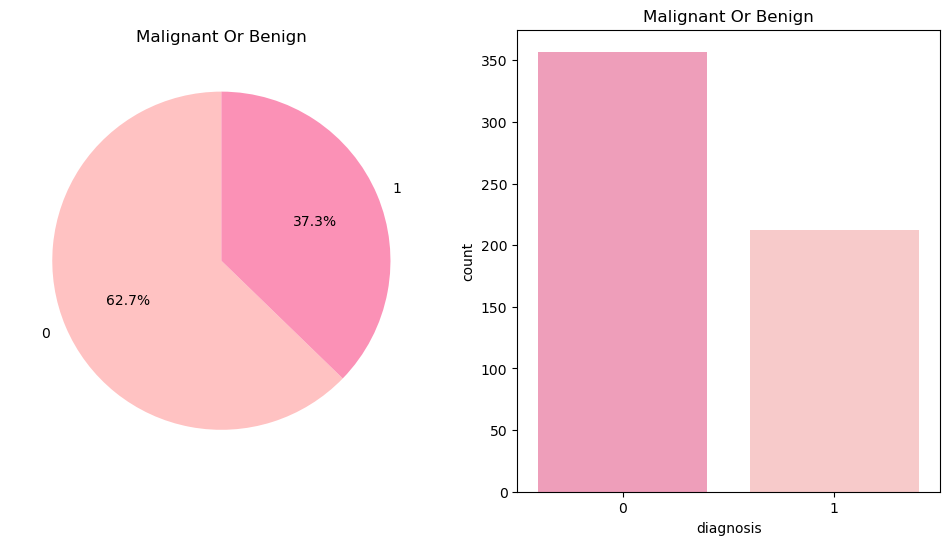

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(can_df2['diagnosis'].value_counts(), labels=can_df2['diagnosis'].value_counts().index,autopct='%1.1f%%',colors=['#FFC2C2', '#fb91b6'],startangle=90)
axs[0].set_title('Malignant Or Benign')

sns.countplot(x='diagnosis',data=can_df2, ax=axs[1], palette=['#fb91b6', '#FFC2C2'])
axs[1].set_title('Malignant Or Benign')

plt.show()


Here 1 stands for malignant and 0 stands for benign, There are more benign breast cancer diagnoses than malignant ones.

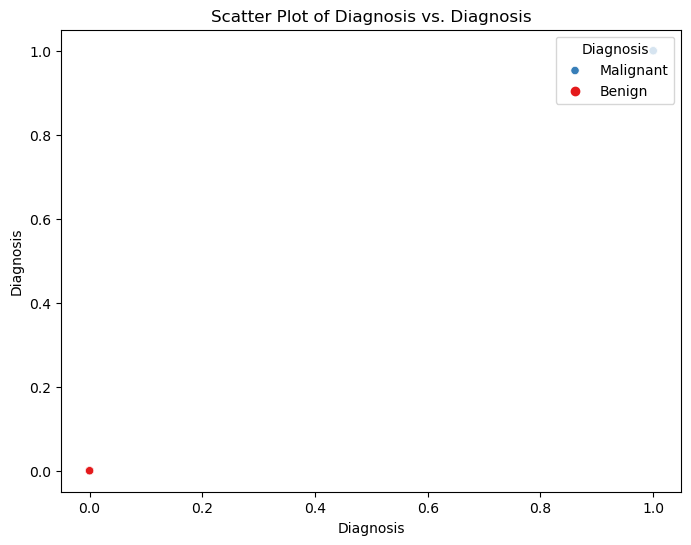

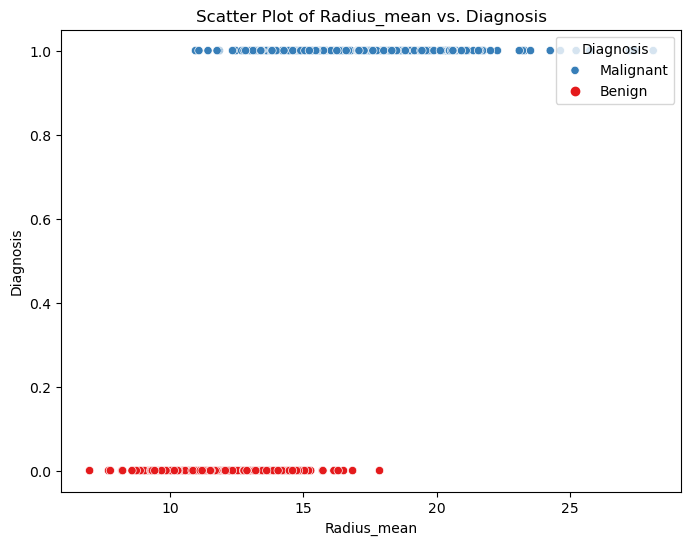

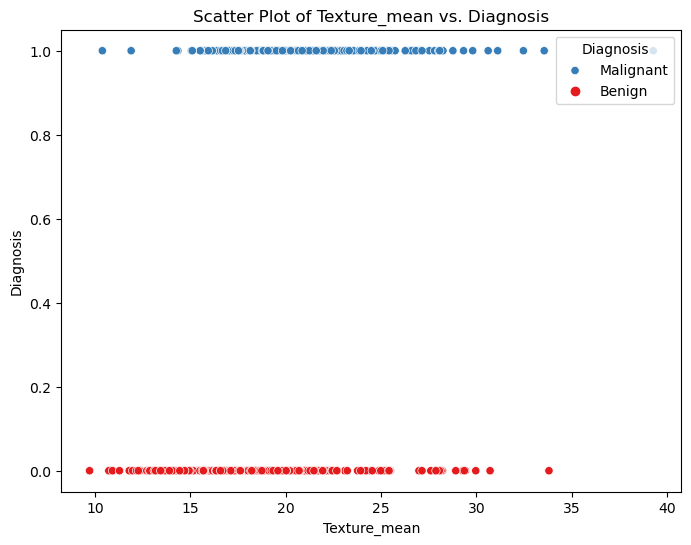

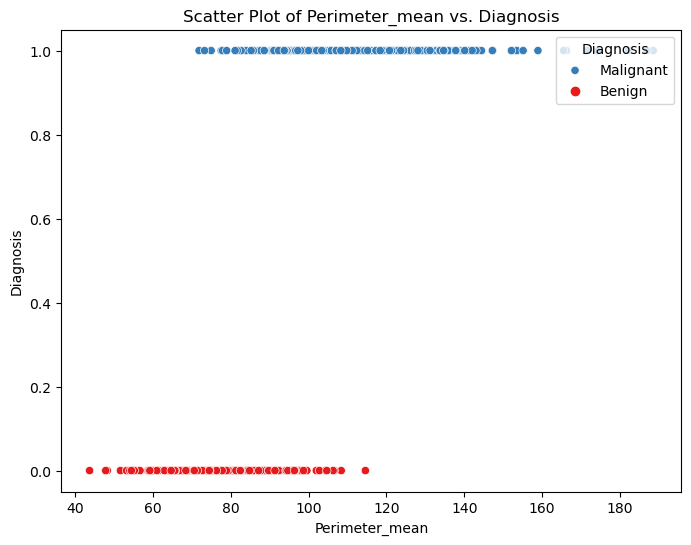

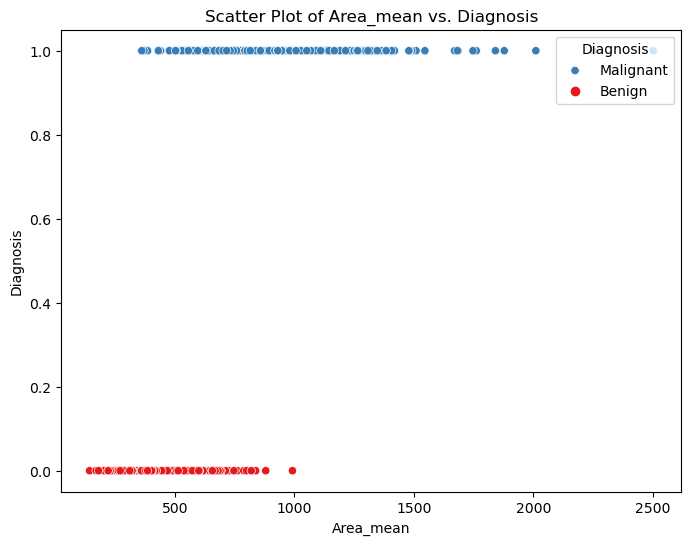

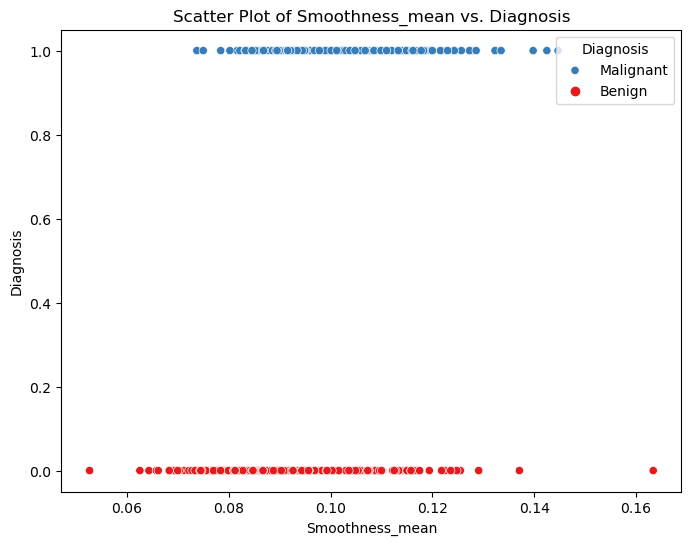

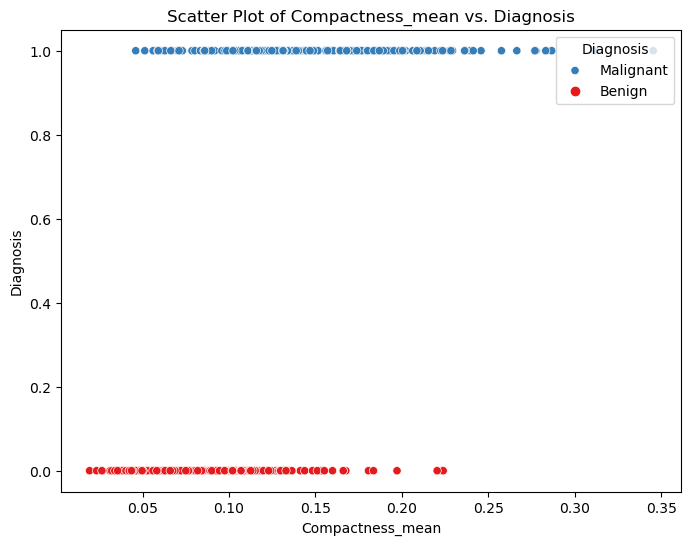

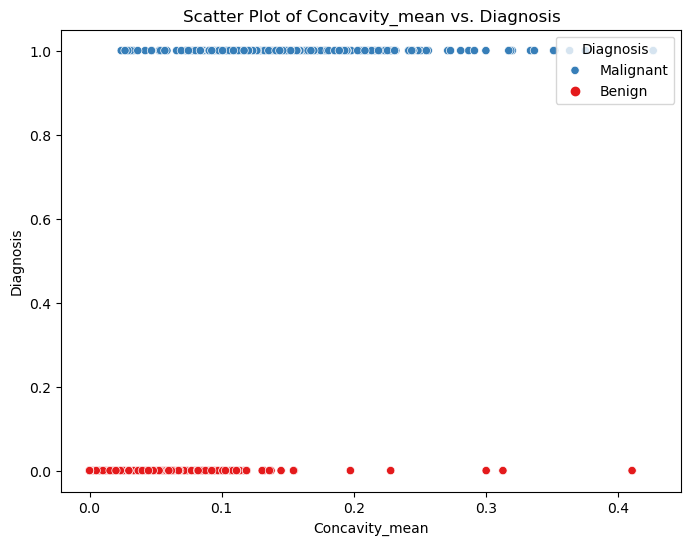

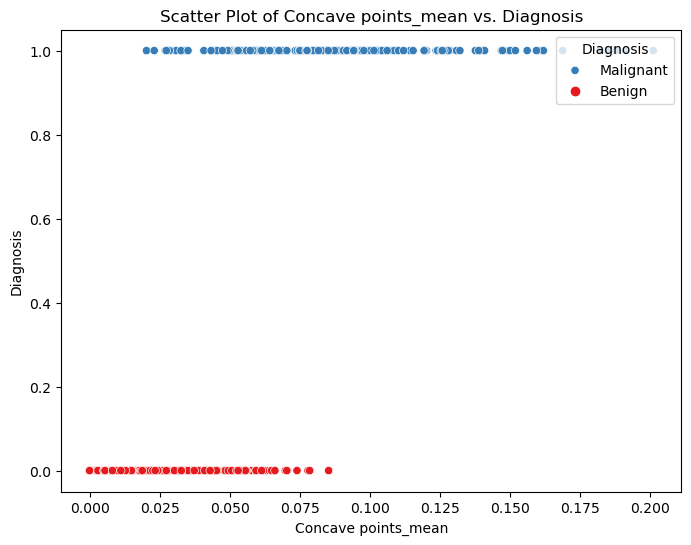

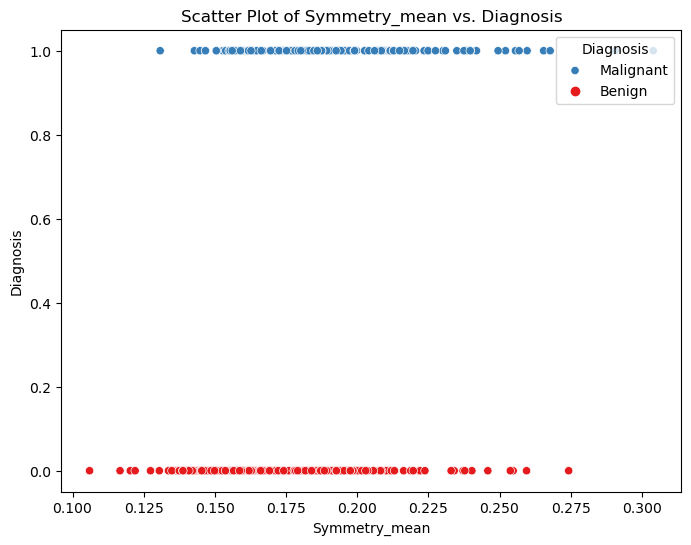

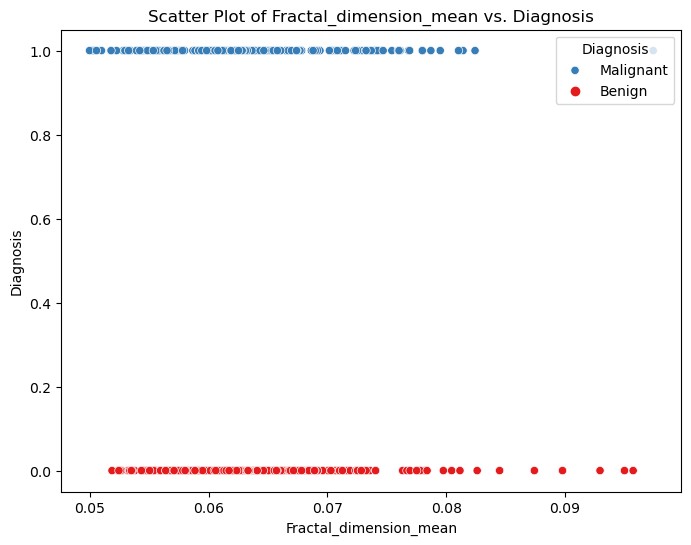

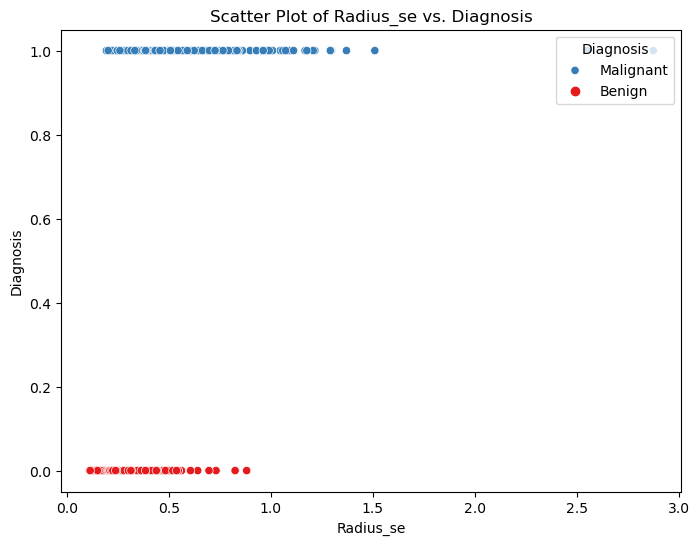

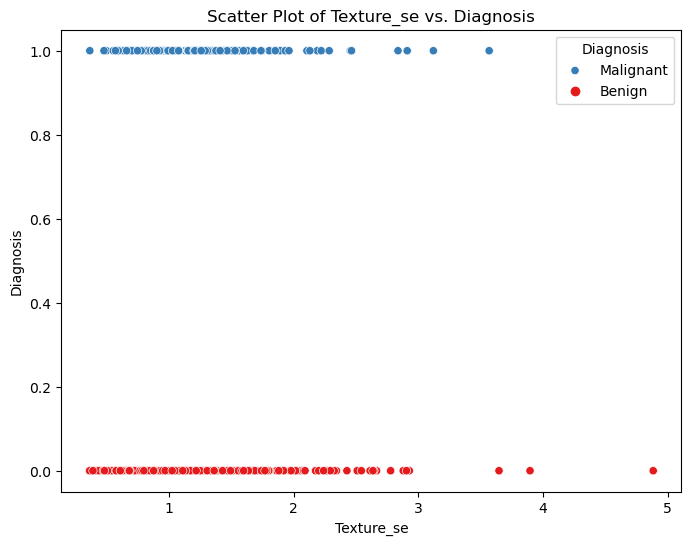

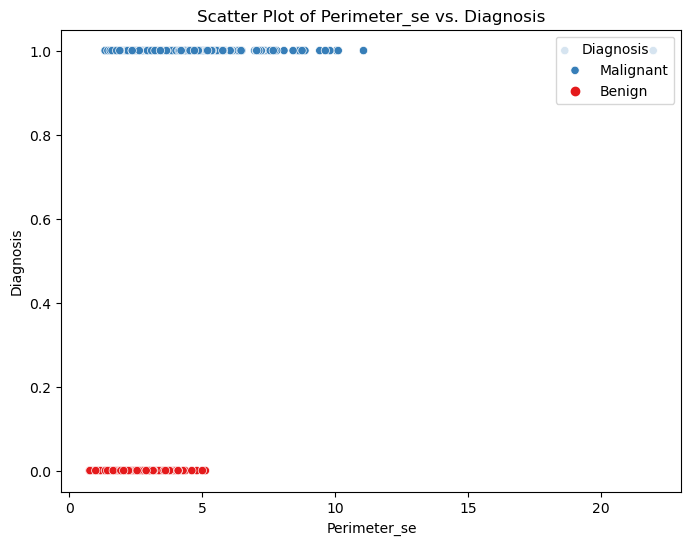

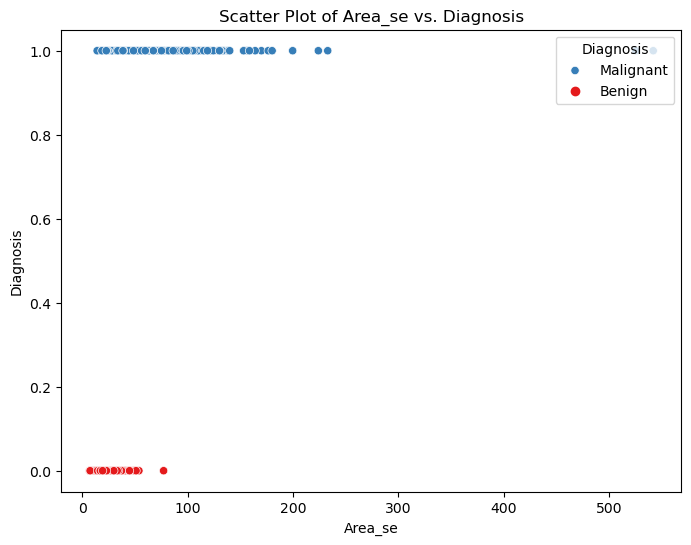

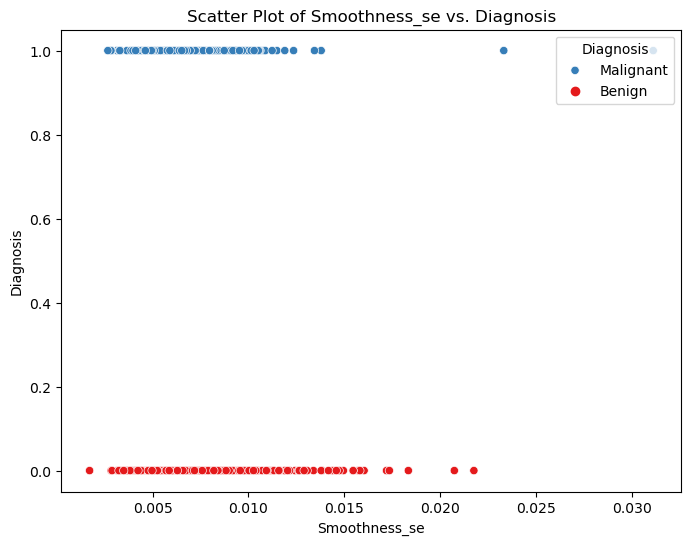

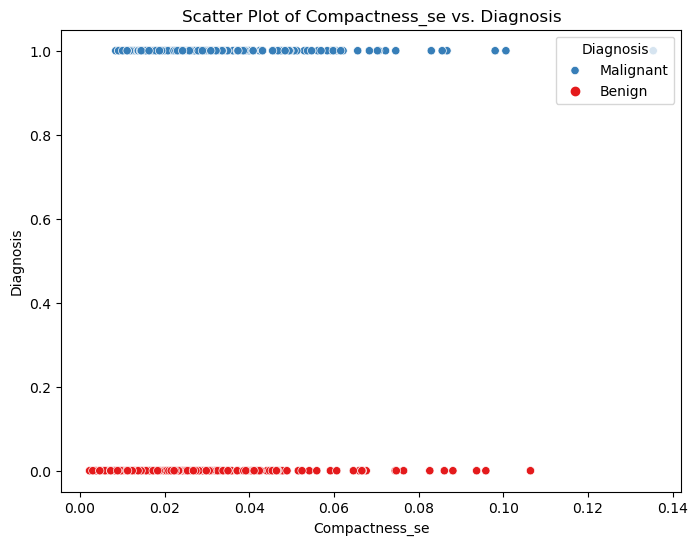

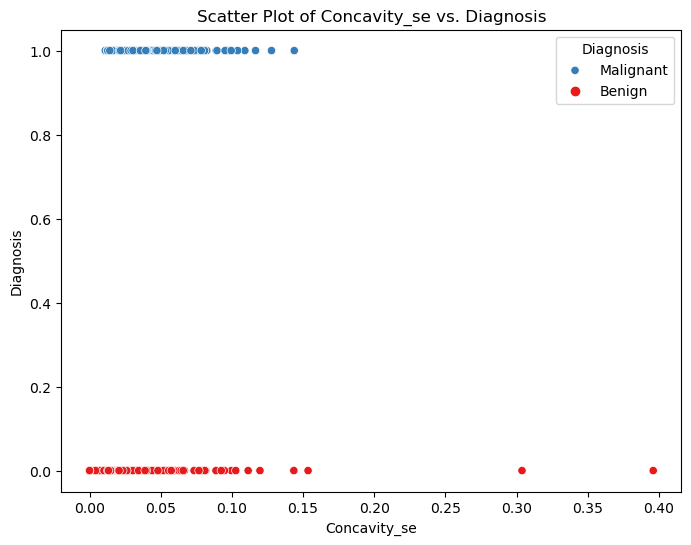

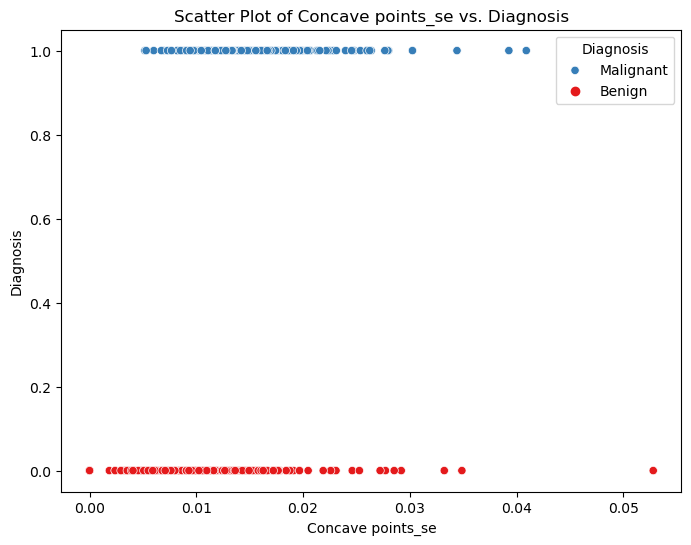

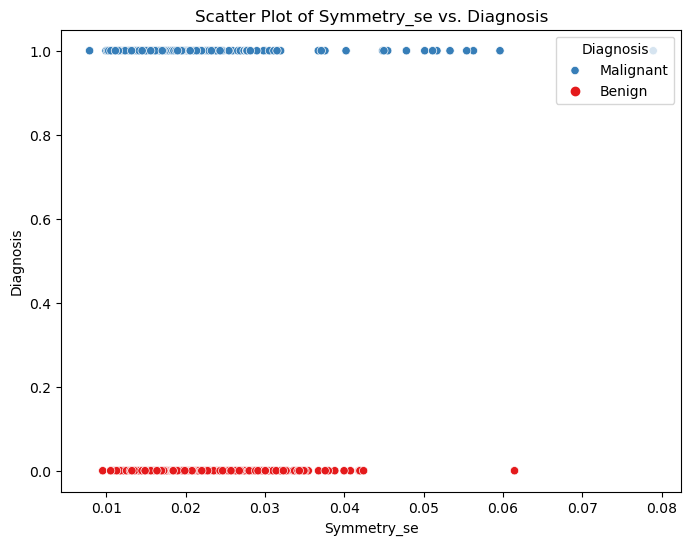

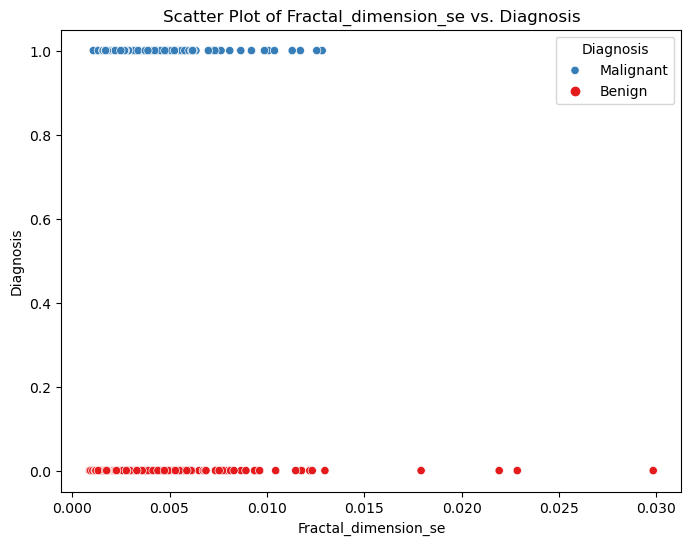

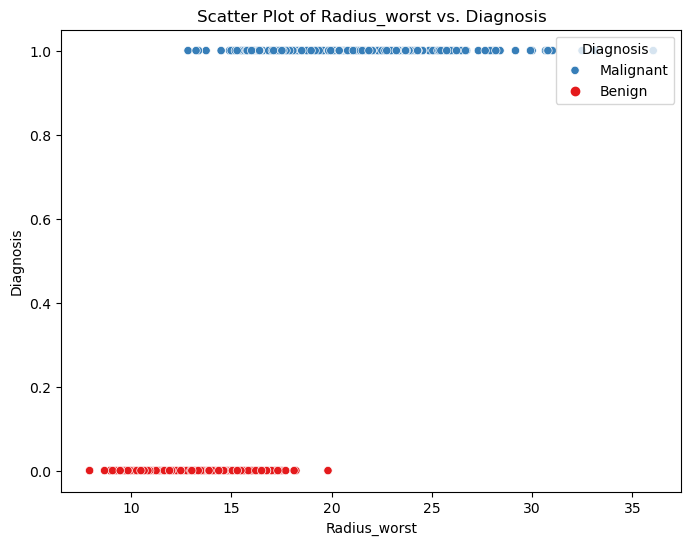

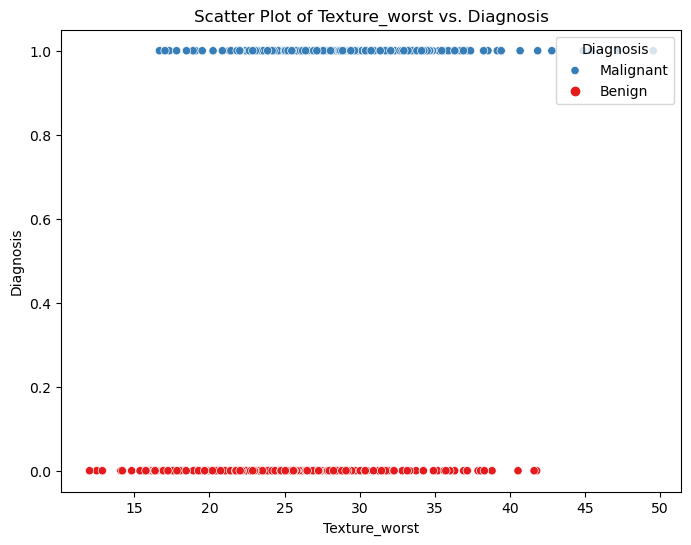

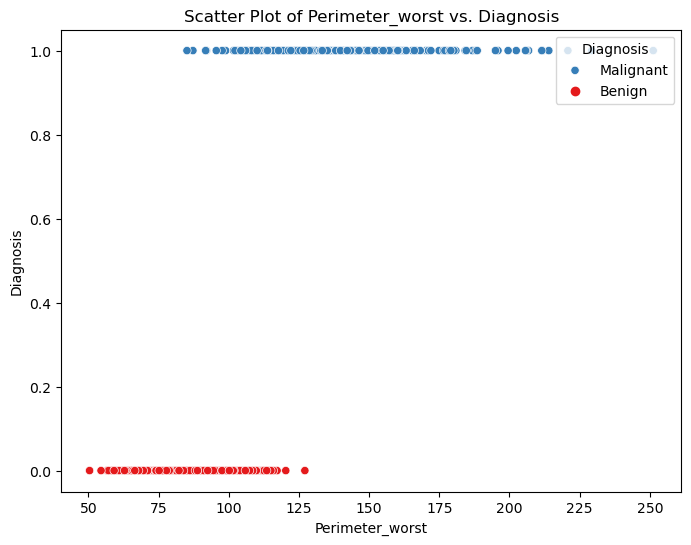

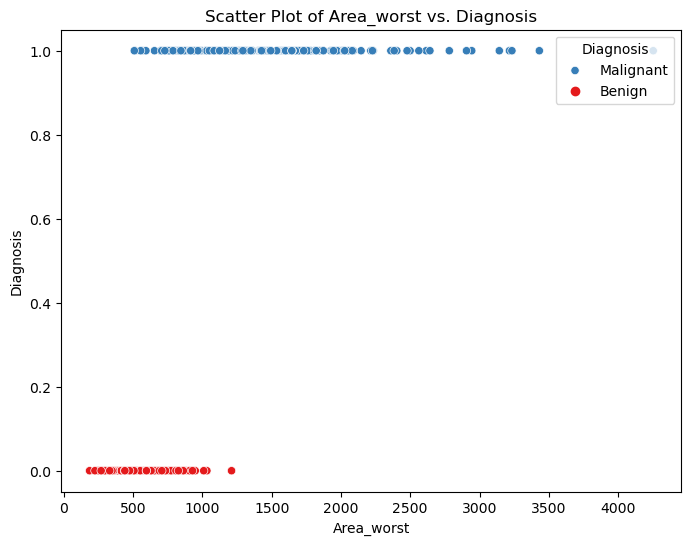

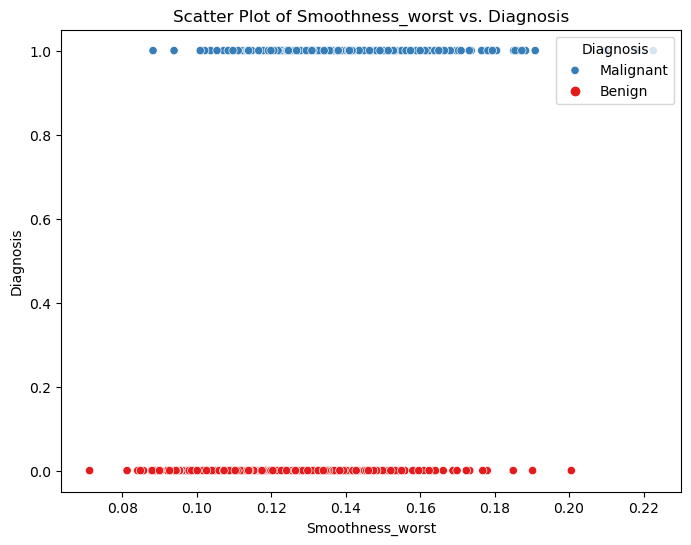

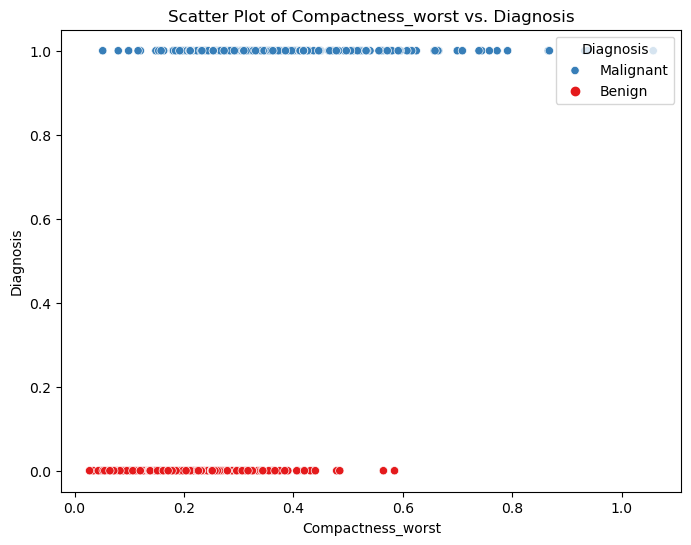

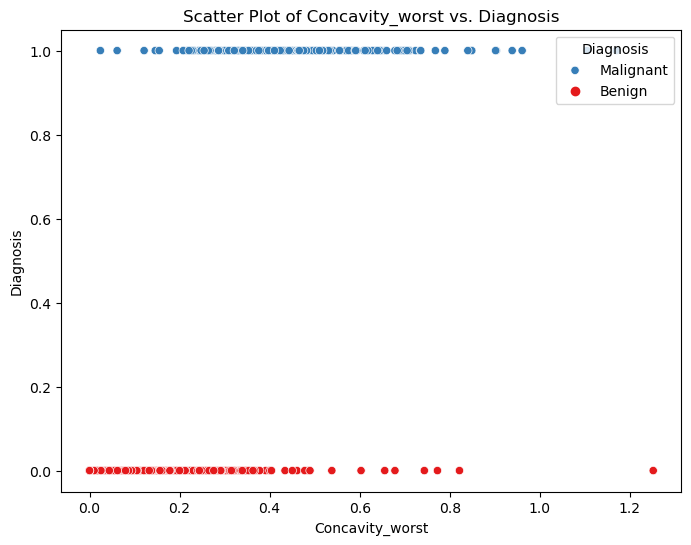

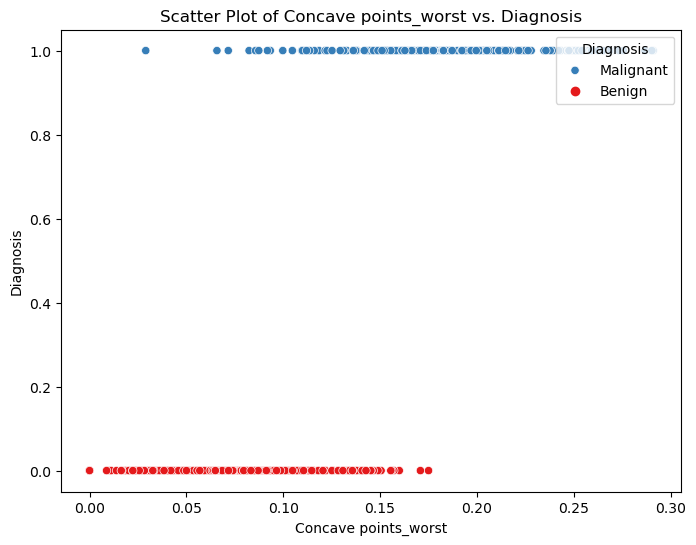

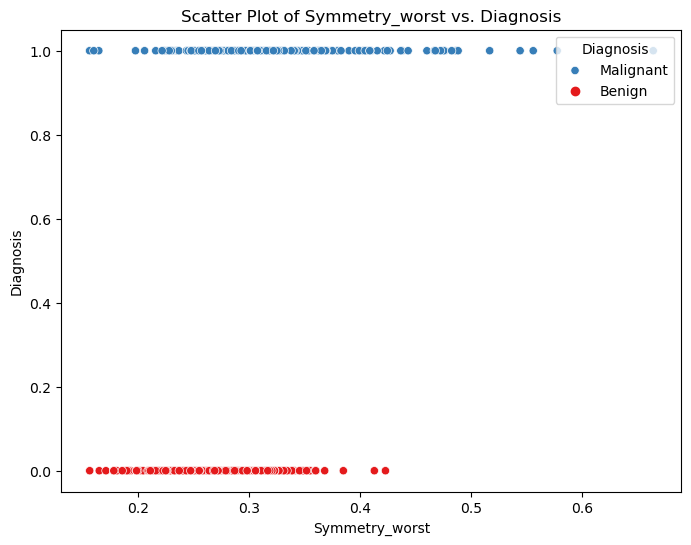

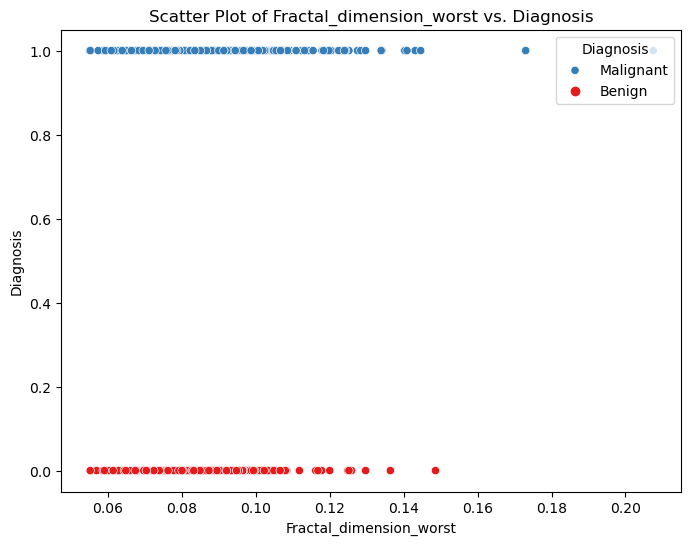

In [17]:
# Creating scatter plots
for var in can_df2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y='diagnosis', data=can_df2, hue='diagnosis', palette='Set1')
    plt.title(f'Scatter Plot of {var.capitalize()} vs. Diagnosis')
    plt.xlabel(var.capitalize())
    plt.ylabel('Diagnosis')
    plt.legend(title='Diagnosis', loc='upper right', labels=['Malignant','Benign',])
    plt.show() 





Key observations that can be made :


1.Higher radius mean values tend to be associated with malignant diagnoses.(radius mean vs diagnosis)

2.There's no visually distinct separation between the benign and malignant diagnoses based on texture mean. Data points for both classes are scattered throughout the entire range of the x-axis. This suggests that texture mean alone might not be a strong differentiating factor for malignancy classification.


3.Mean area is greater in malignant.


4.Compactness mean , convactivity mean, symmetry worst , concave points worst , perimeter and radius worst have clear distinction in malignant and benign tumor determination.



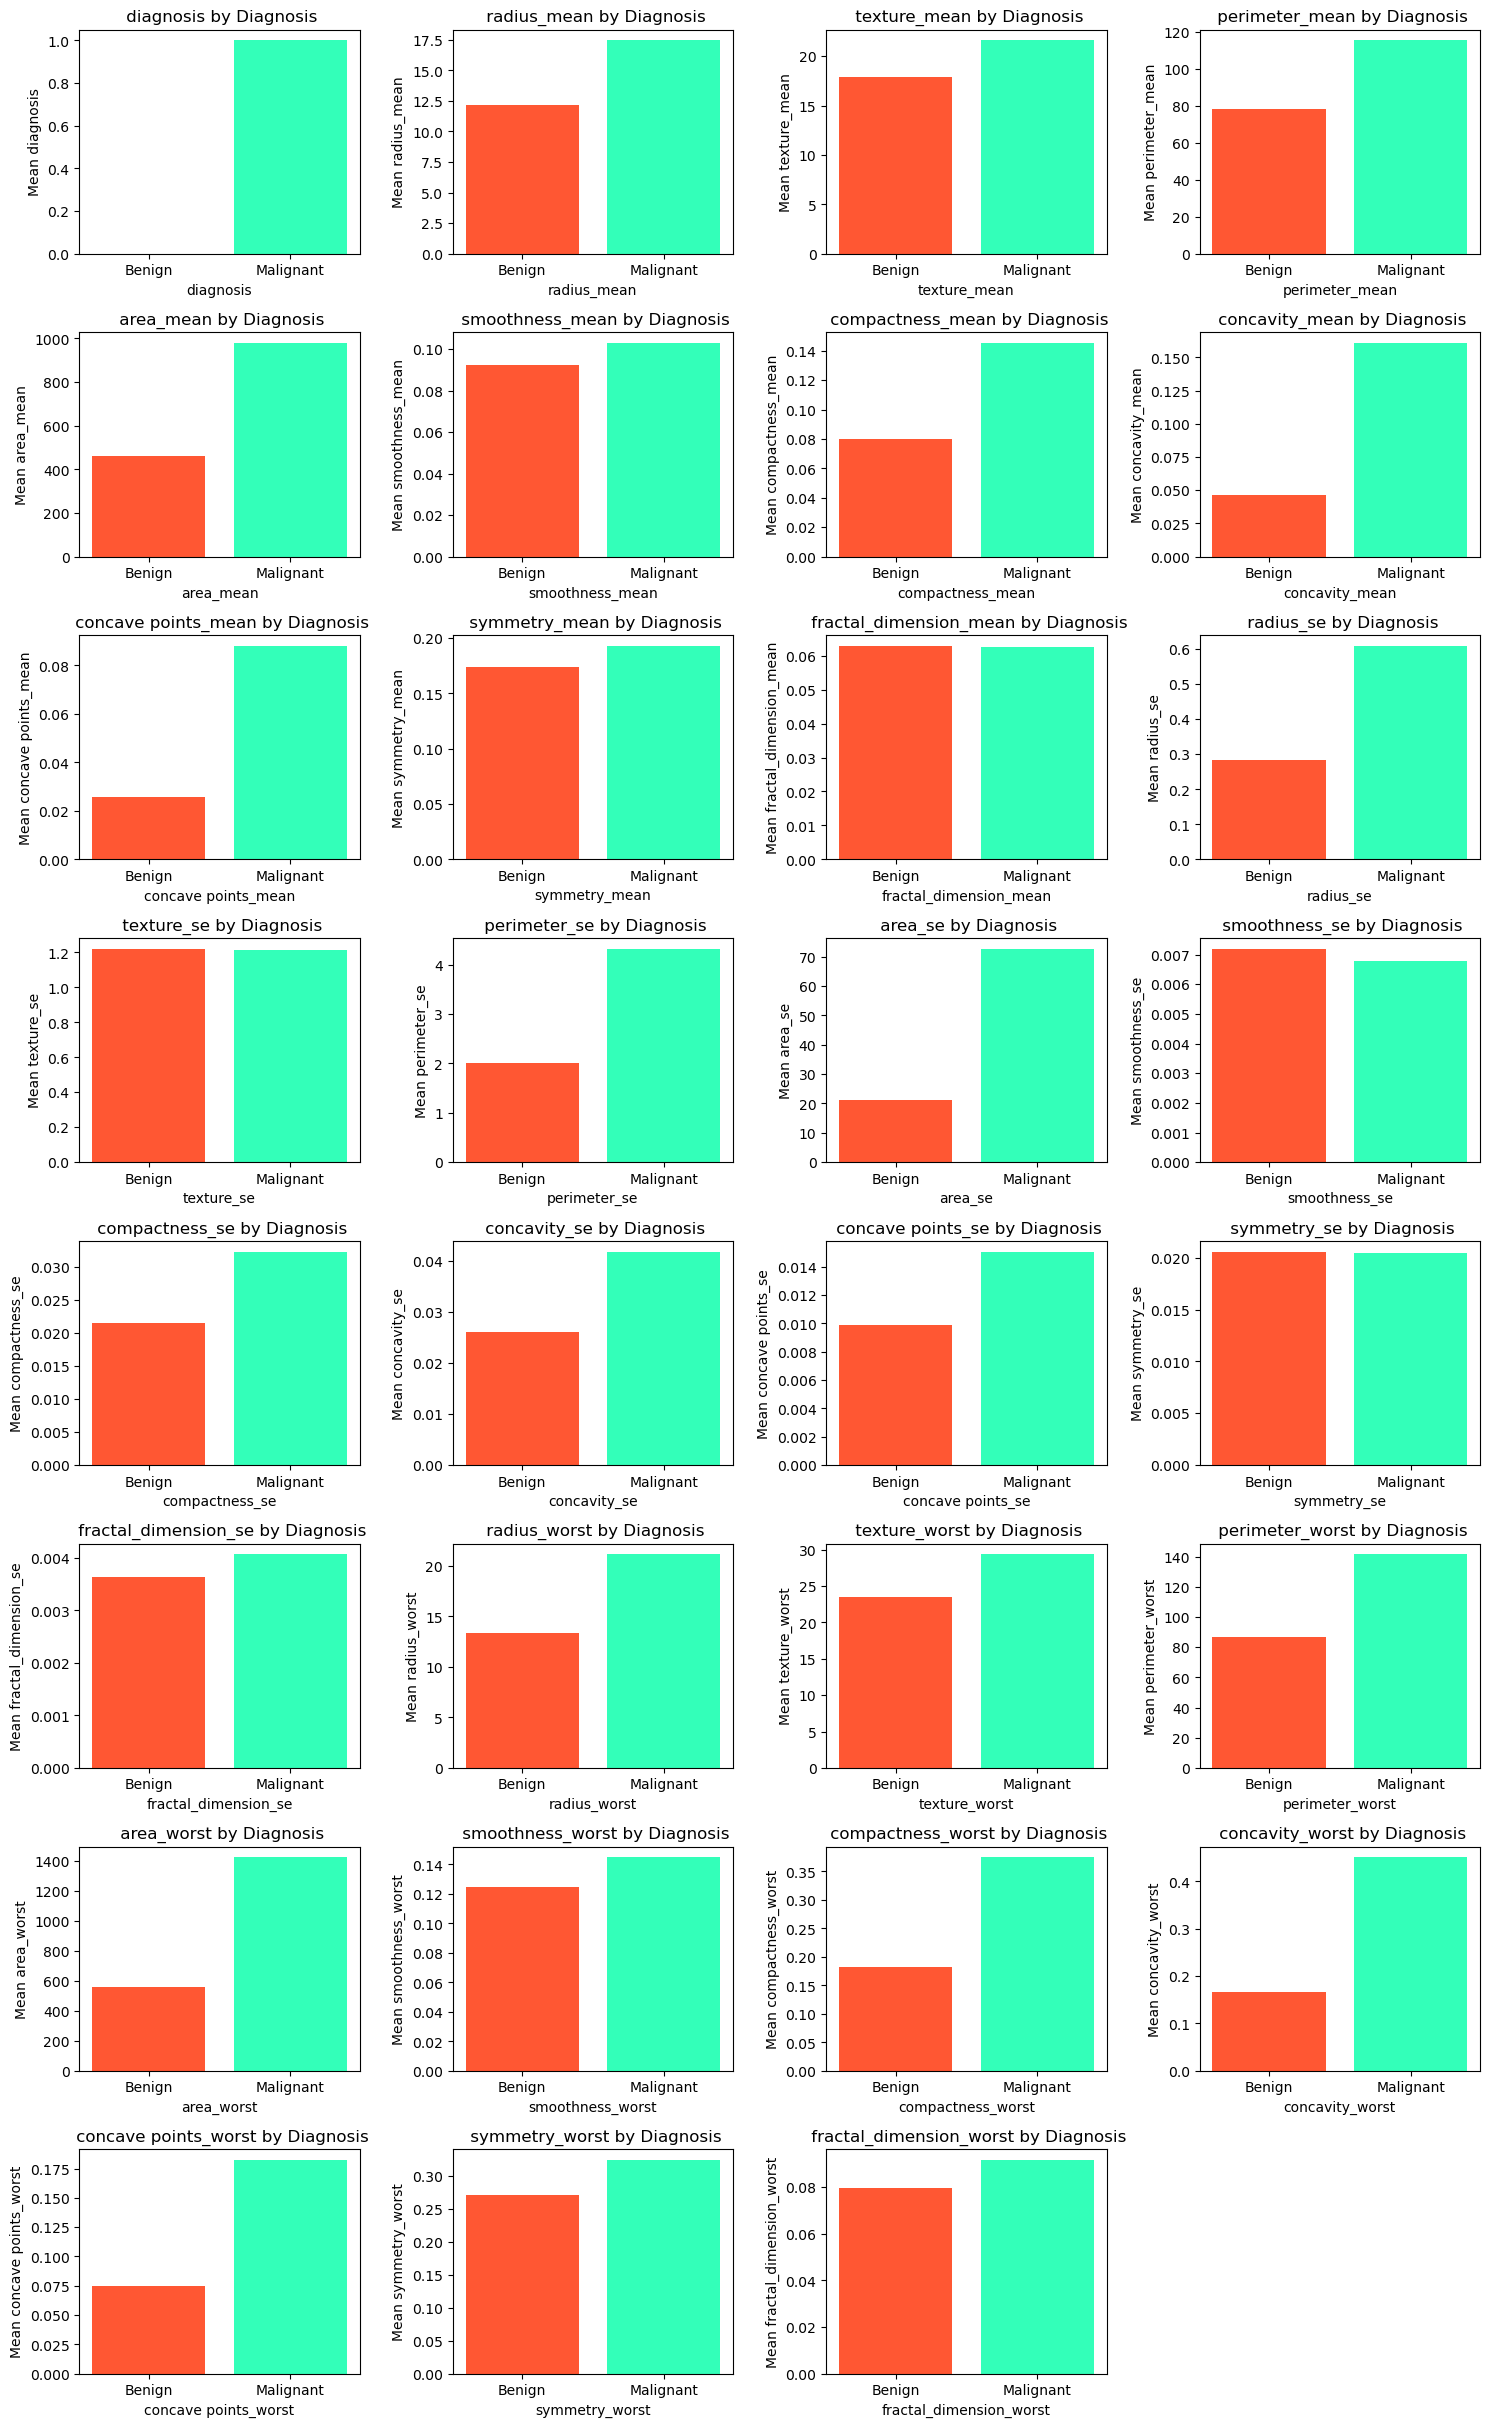

In [18]:
num_plots = len(can_df2.columns)
num_cols = 4
num_rows = (num_plots // num_cols) + (num_plots % num_cols)

plt.figure(figsize=(15, 3*num_rows))  
for i, col in enumerate(can_df2.columns, 1):
    plt.subplot(num_rows, num_cols, i)  
    value_mean = can_df2.groupby('diagnosis')[col].mean()
    plt.bar(value_mean.index, value_mean.values, color=['#FF5733', '#33FFB9'])
    plt.xlabel(col)
    plt.ylabel(f'Mean {col}')
    plt.title(f' {col} by Diagnosis')
    plt.xticks(value_mean.index, ['Benign', 'Malignant'])
plt.tight_layout()  
plt.show()

Multiple bar plots to visualize the mean values of different features (columns) in the DataFrame

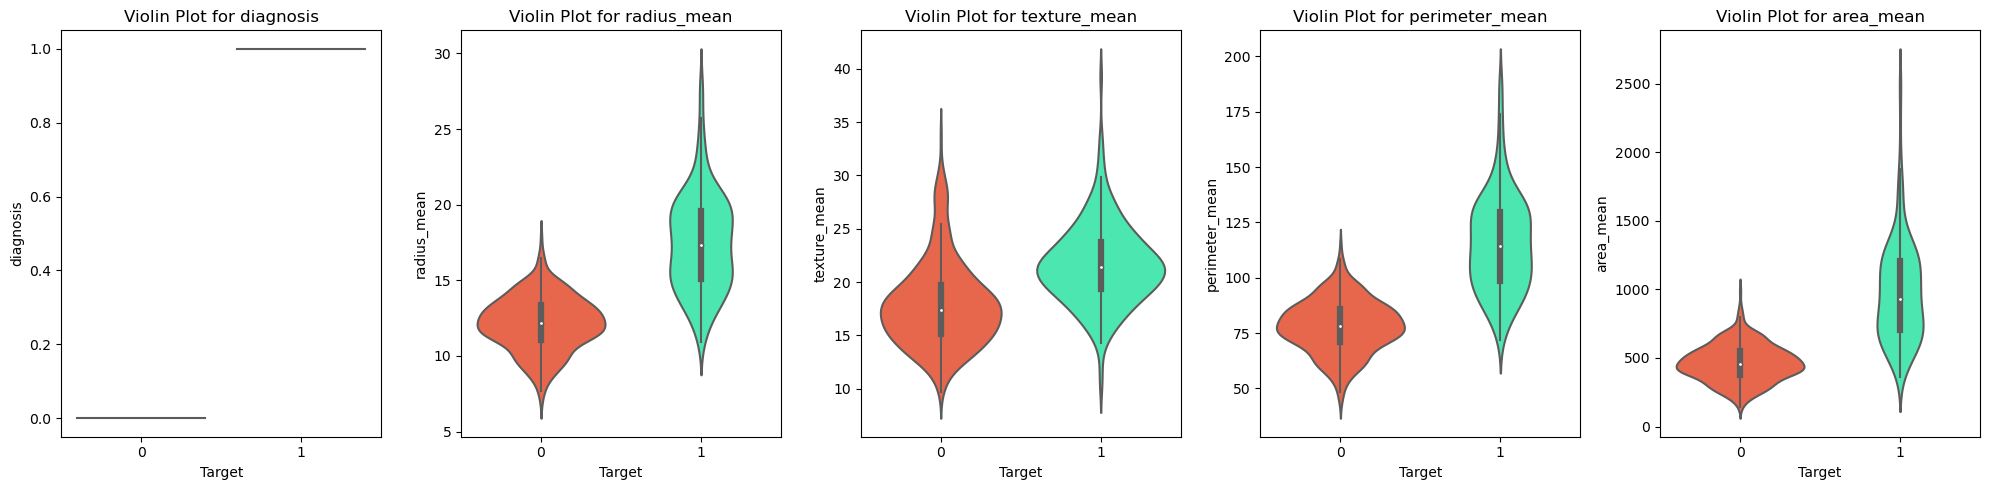

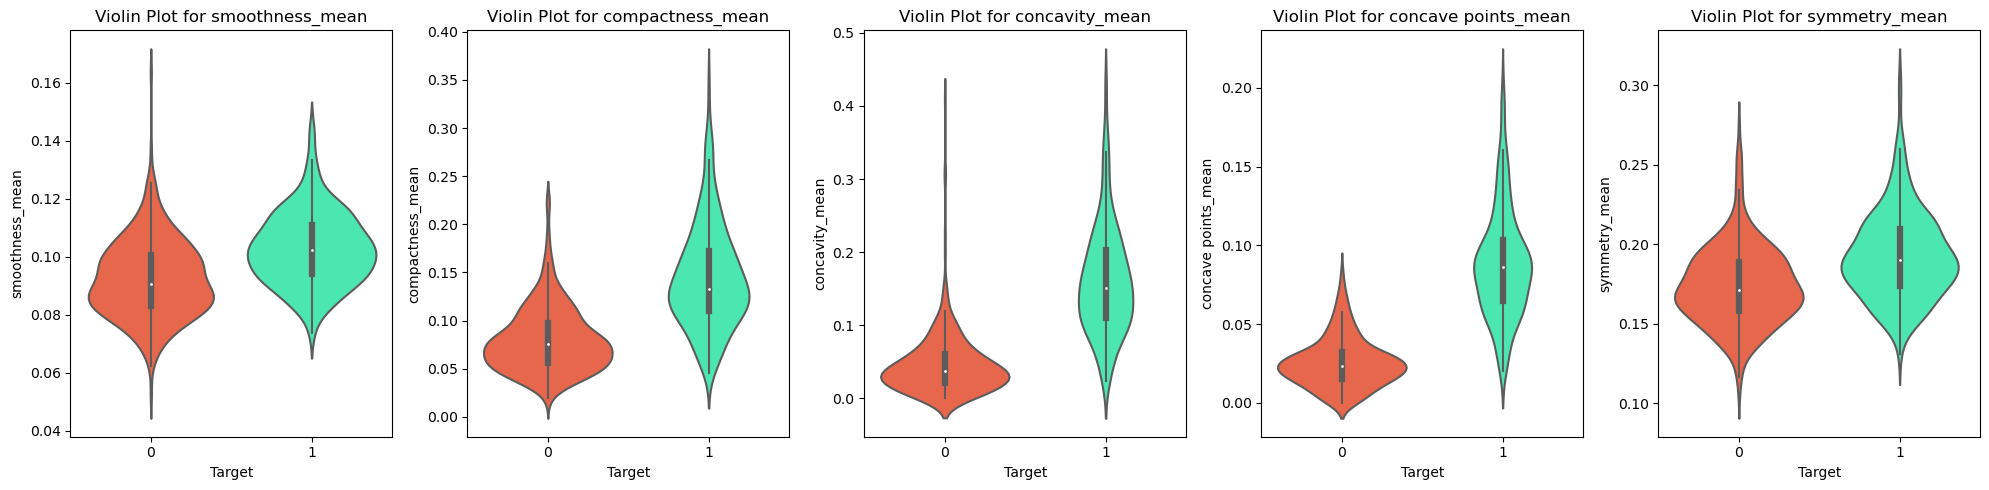

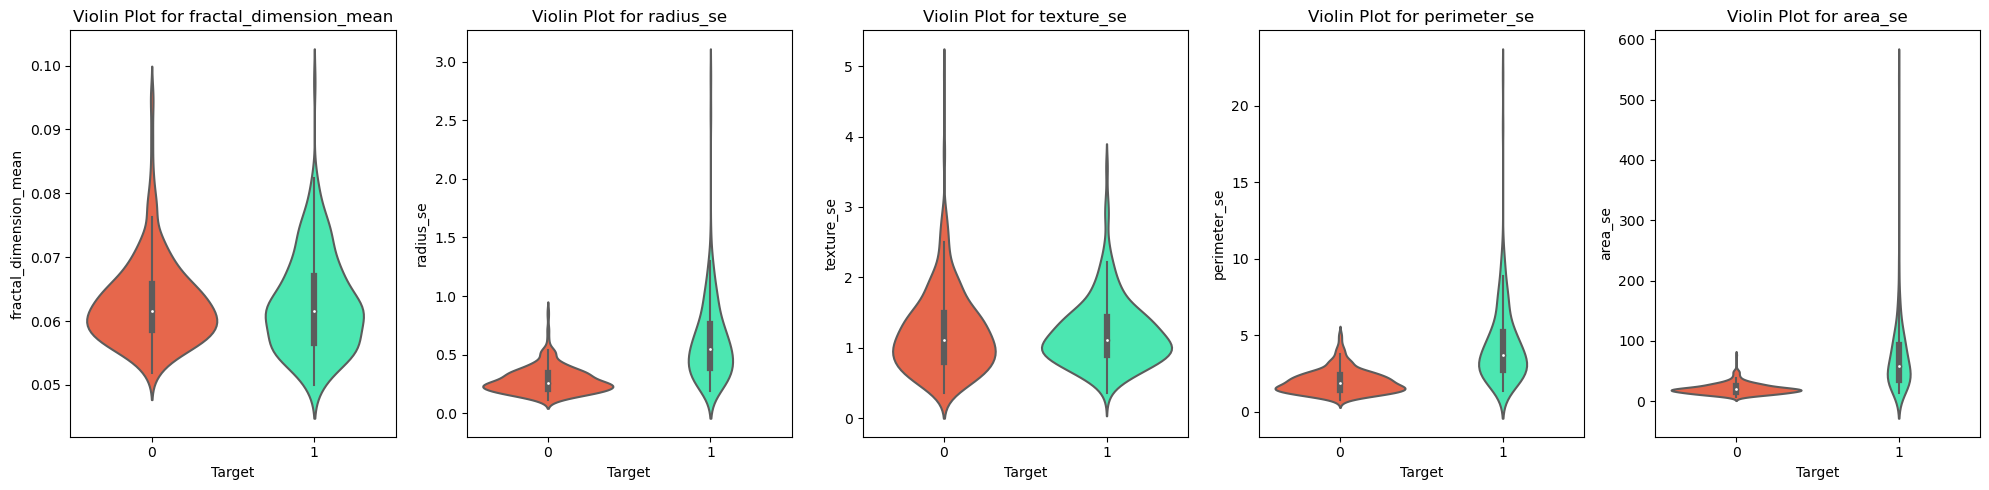

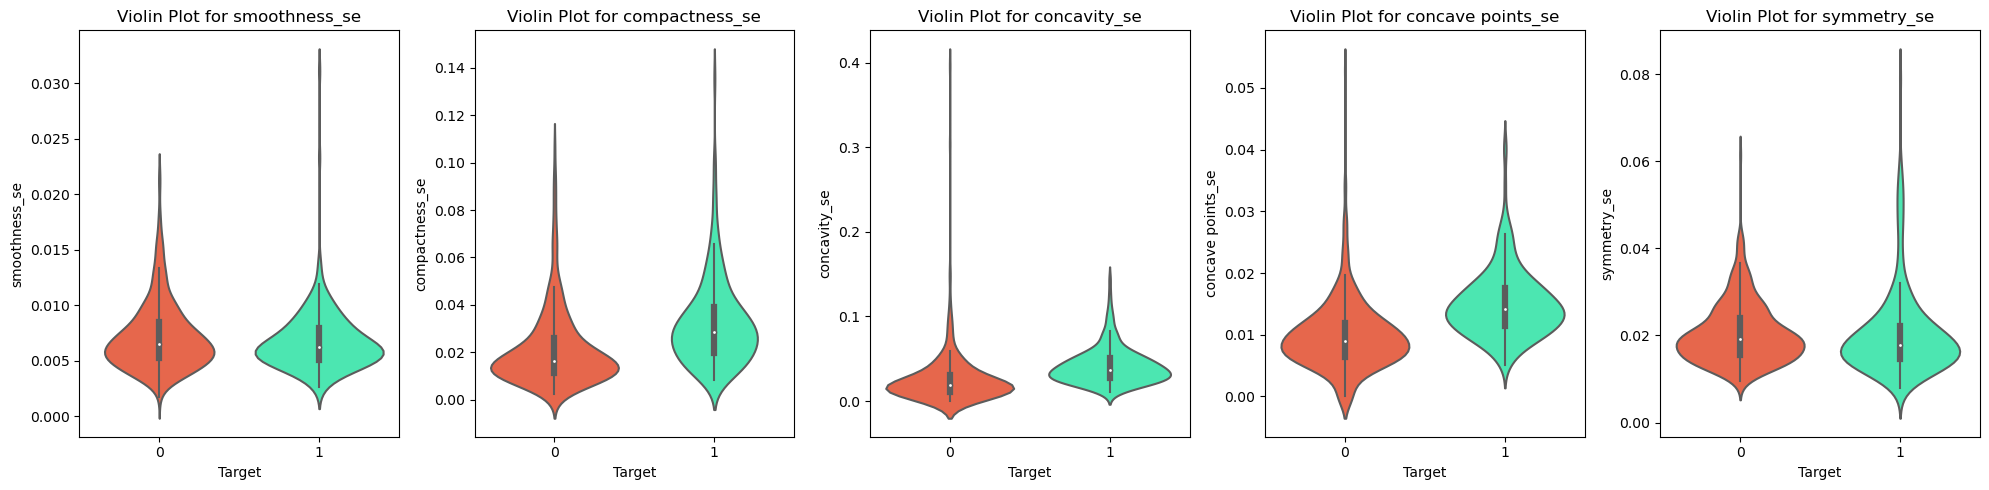

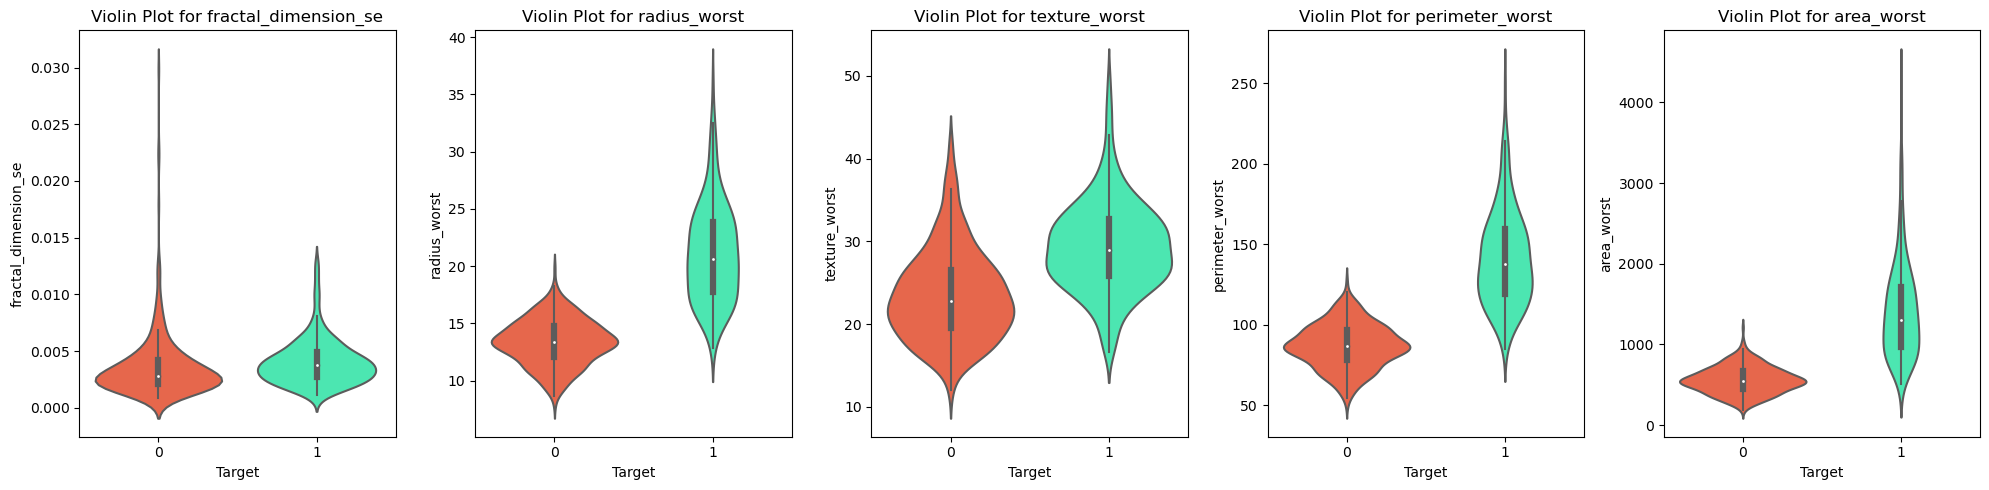

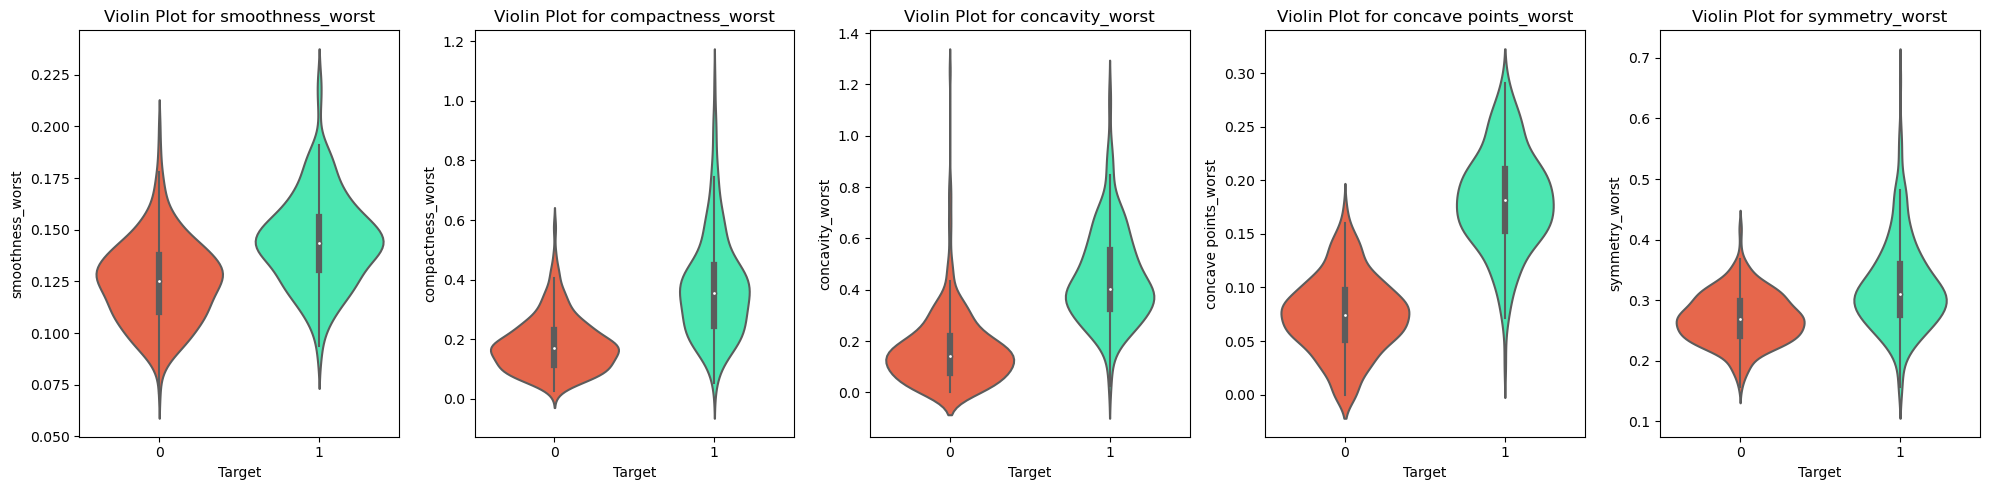

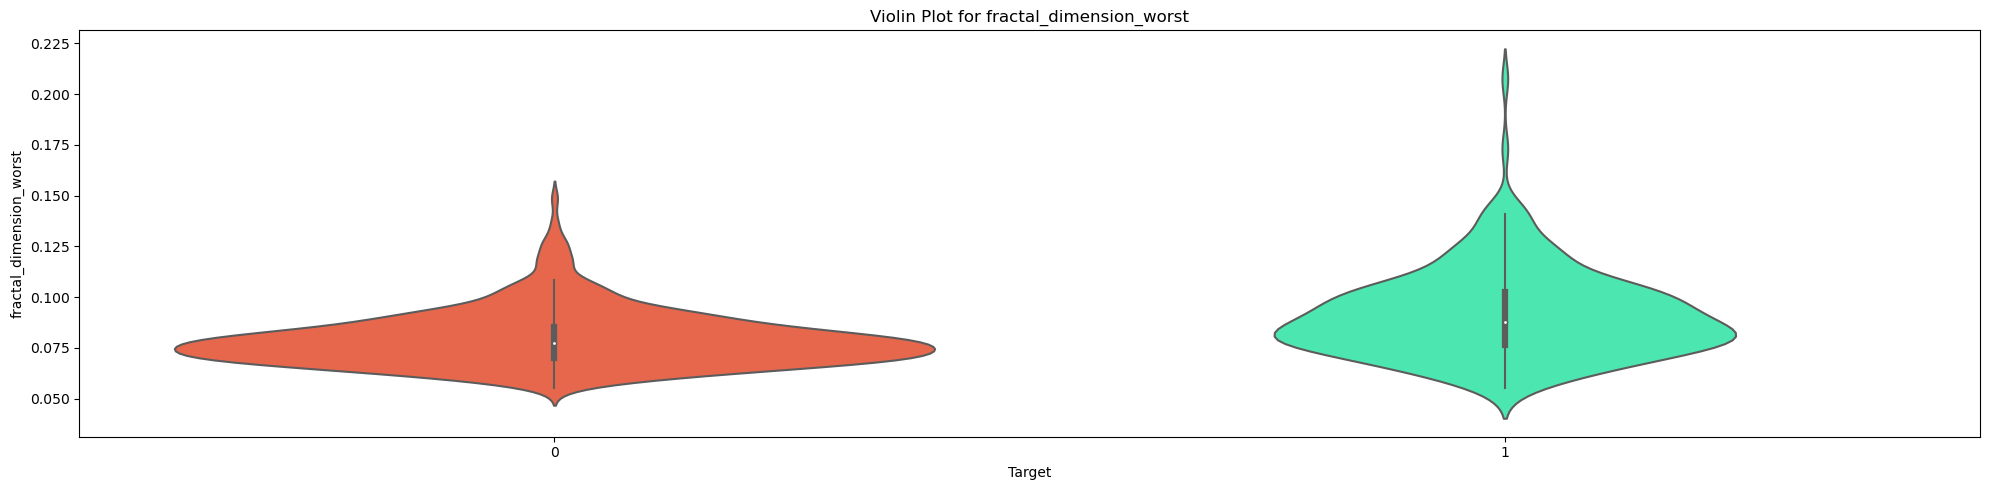

In [19]:

# Combine the numerical features and target column into a single DataFrame
data_with_target = can_df2.copy()
data_with_target['diagnosis'] = can_df2['diagnosis']

# Select only the numerical columns
features = data_with_target.select_dtypes(include=['float64', 'int64'])

# Split the numerical columns into groups of 5
num_cols_groups = [features.columns[i:i+5] for i in range(0, len(features.columns), 5)]

# Define custom color palette
custom_palette = ['#FF5733', '#33FFB9']

for cols_group in num_cols_groups:
    # Create a figure with subplots for each group of 5 numerical columns
    fig, axs = plt.subplots(1, len(cols_group), figsize=(20, 5))

    # Flatten the axes array to make it iterable
    axs_flat = np.ravel(axs)

    # Plot violin plots for each group of 5 numerical columns by the target column
    for i, col in enumerate(cols_group):
        sns.violinplot(x='diagnosis', y=col, data=data_with_target, ax=axs_flat[i], palette=custom_palette)
        axs_flat[i].set_title(f'Violin Plot for {col}')
        axs_flat[i].set_xlabel('Target')
        axs_flat[i].set_ylabel(col)

    plt.tight_layout() 
    plt.show()


Violin plot     

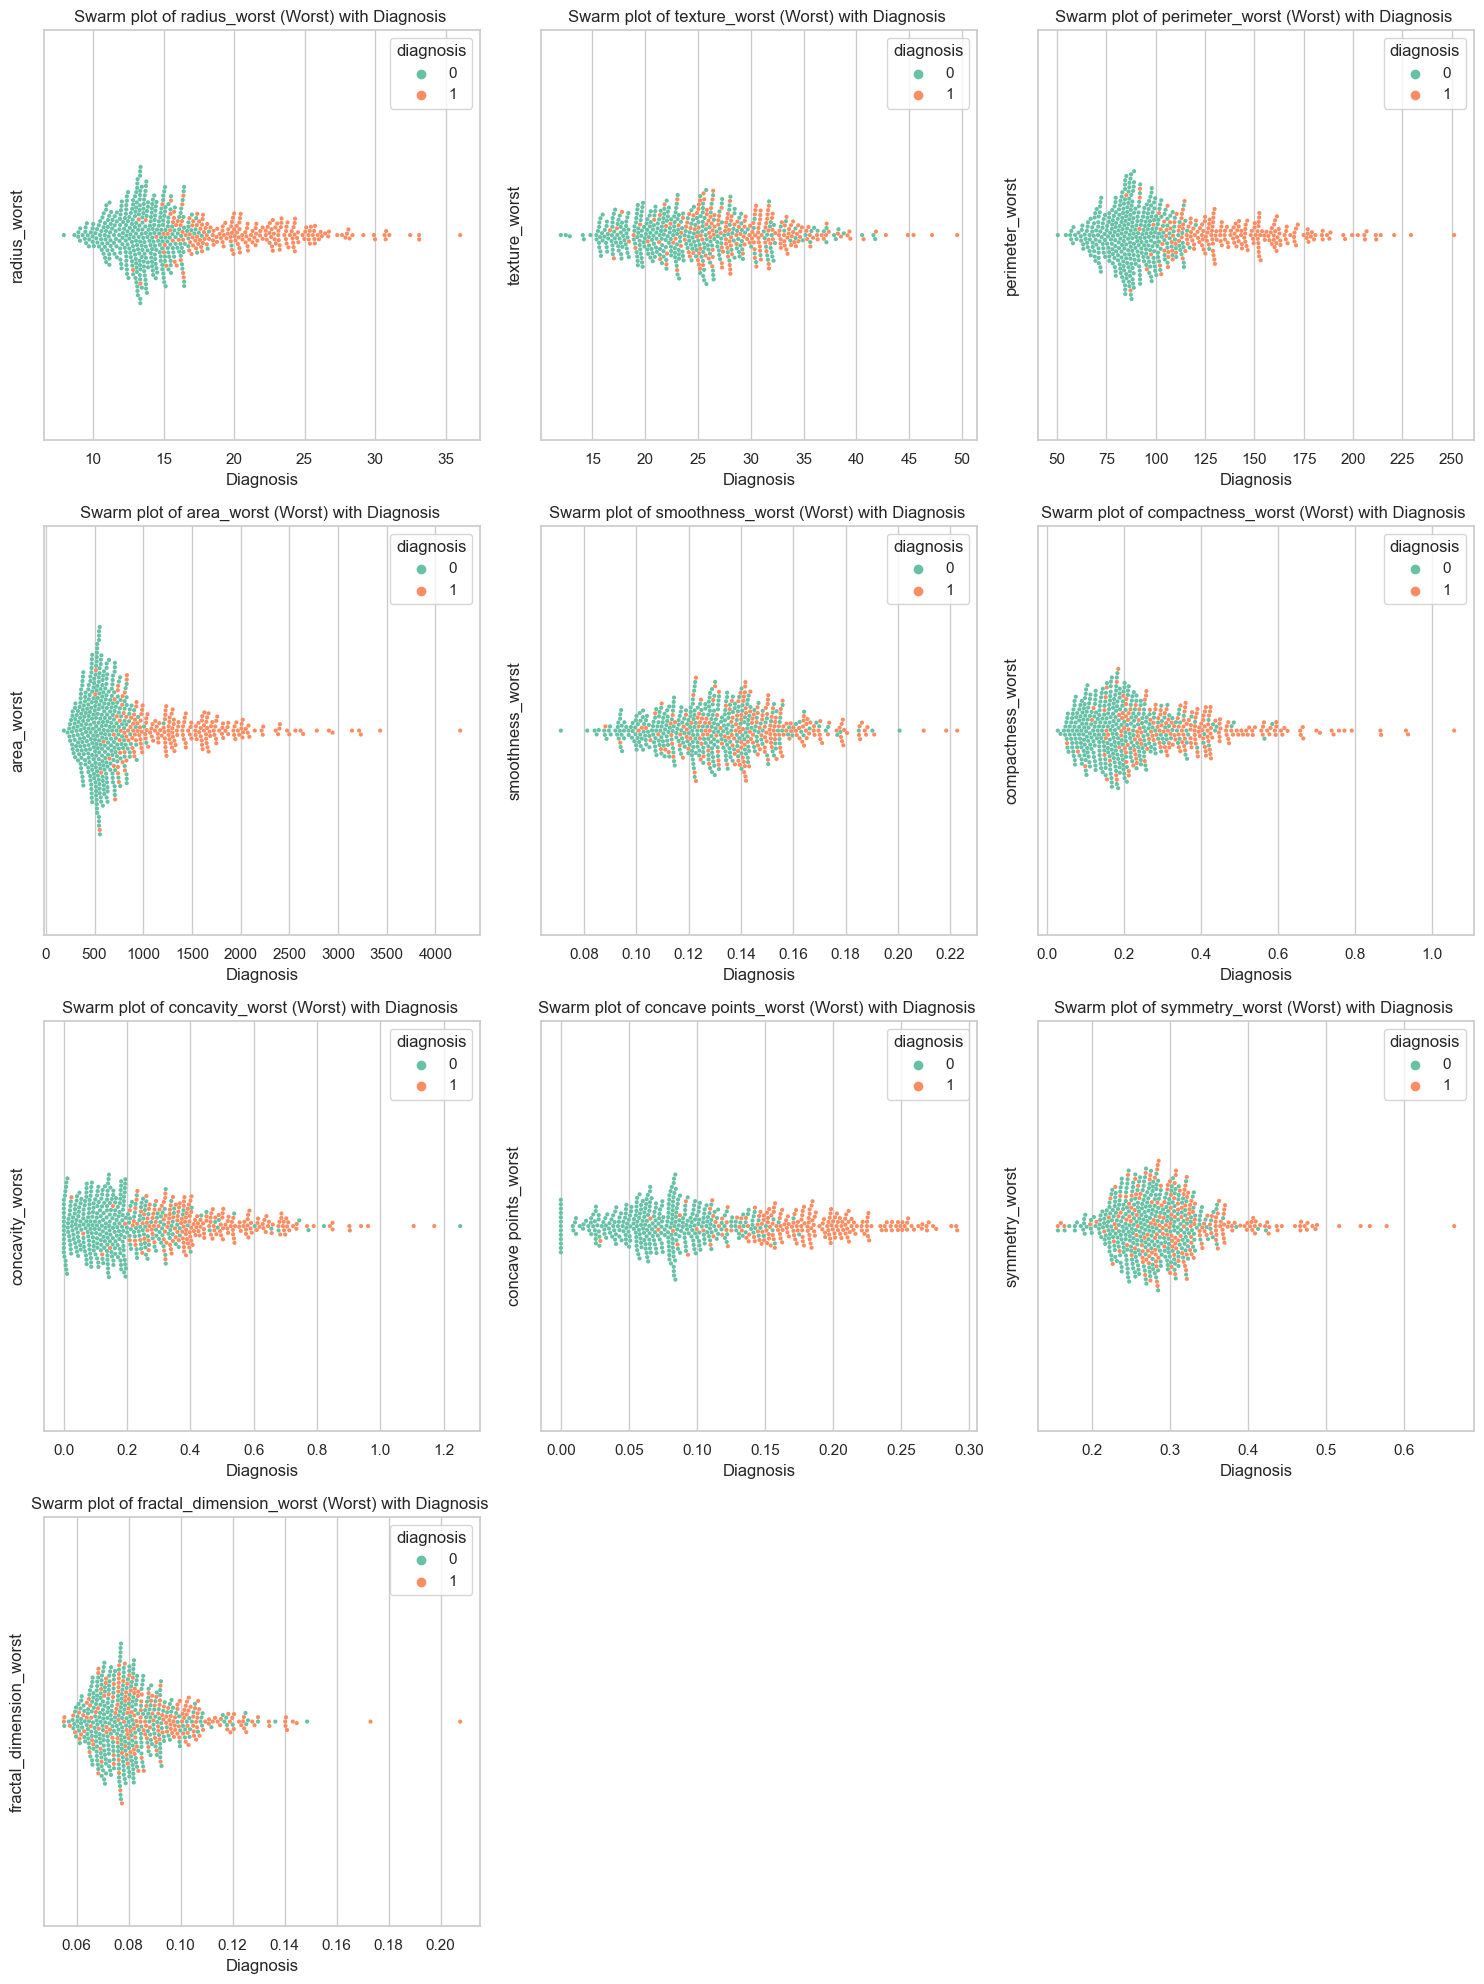

In [20]:


df_worst = can_df2[['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

# Merge the df_worst and data datasets on a common column (e.g., index) to combine the target column with the worst values data
merged_df_worst = df_worst.merge(can_df2[["diagnosis"]], left_index=True, right_index=True)

# Set the style of the plots
sns.set(style="whitegrid")

# Define the number of rows and columns for subplots
num_features = len(df_worst.columns)
num_cols = 3
num_rows = -(-num_features // num_cols)  # Calculate the number of rows using ceiling division

# Create subplots for each feature
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop over each feature and create a swarm plot for each feature with hue=target from the data 
for i, feature in enumerate(df_worst.columns):
    ax = axes[i]
    sns.swarmplot(x=feature, hue='diagnosis', data=merged_df_worst, palette='Set2', ax=ax,size = 3)
    ax.set_title(f'Swarm plot of {feature} (Worst) with Diagnosis ')
    ax.set_xlabel('Diagnosis')
    ax.set_ylabel(feature)

# Remove any extra empty plots
for j in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


These swarm plots show the worst values (i.e , largest and lowest values observed ) ,It represents the most severe characteristics observed in the breast cancer cells.By comparing the worst values between malignant and benign cases, doctors can assess the severity of the tumors based on these extreme measurements.

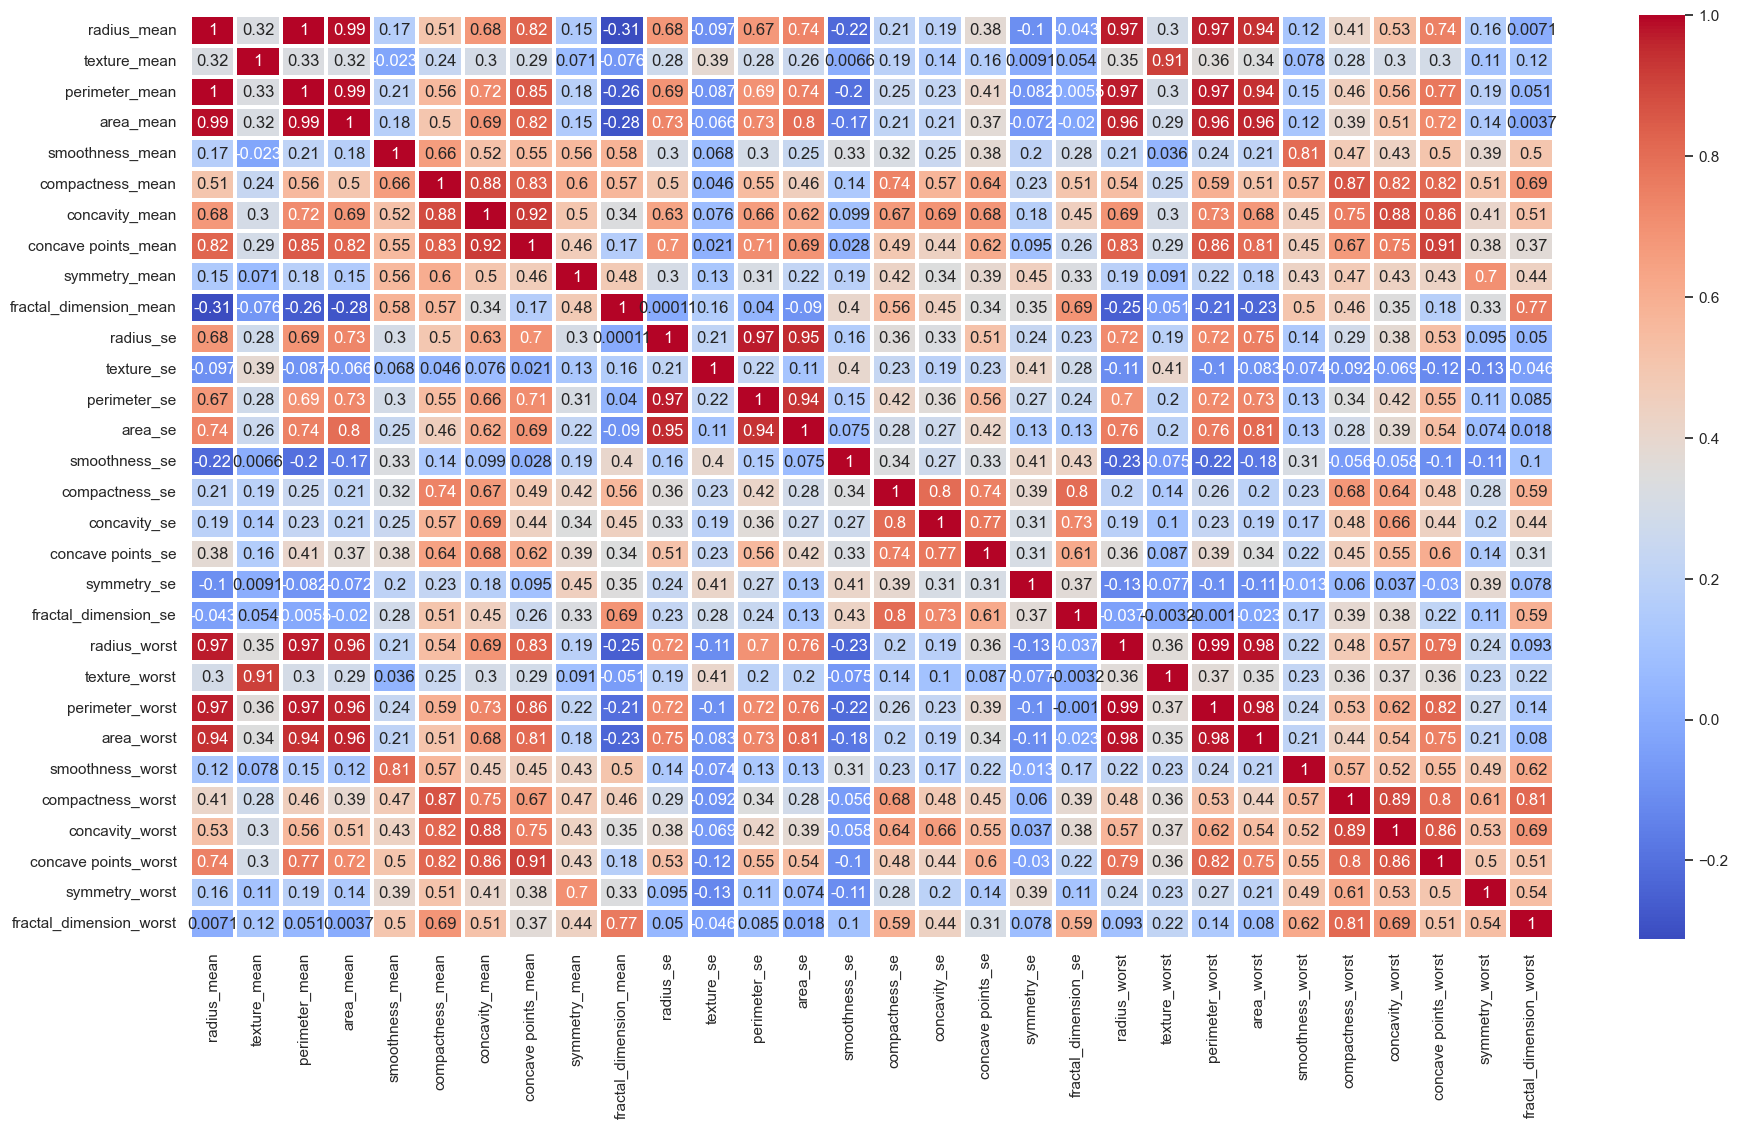

In [21]:
#correlation heatmap
can_corr = can_df2.select_dtypes(include=['float64']) 
plt.figure(figsize=(22, 12))
sns.heatmap(data=can_corr.corr(), cmap='coolwarm', linewidths=1.5, linecolor='white', annot=True)
plt.show()


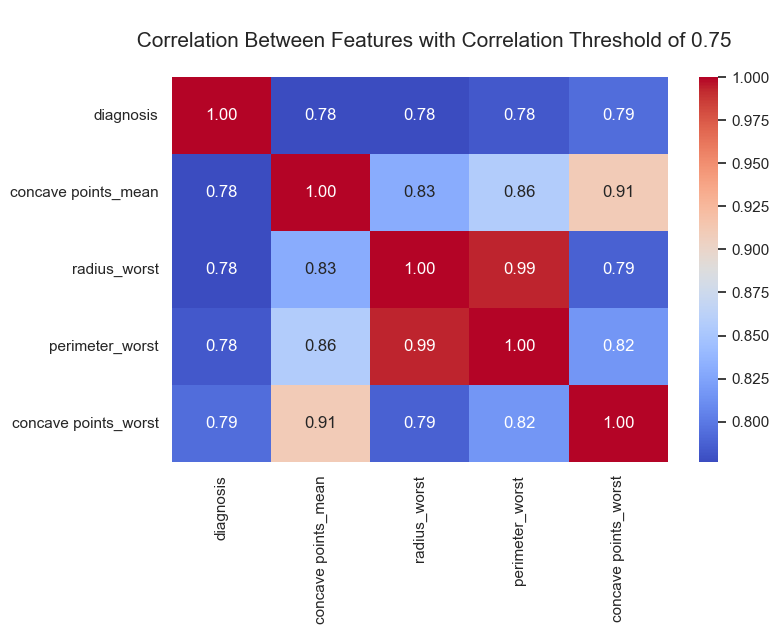

In [22]:
cor = can_df2.corr()
threshold = 0.75
filtre = np.abs(cor["diagnosis"] > threshold)
corr_features = cor.columns[filtre].tolist()
plt.figure(figsize=(8,5))
sns.heatmap(can_df2[corr_features].corr(), annot = True, fmt = ".2f", cmap='coolwarm')
plt.title("\n     Correlation Between Features with Correlation Threshold of 0.75\n",fontsize=15)
plt.show()


# MODEL BUILDING

Method - 1

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Splitting data
X = can_df2.drop('diagnosis', axis=1)
y = can_df2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
# Making predictions and calculating accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = '*' , color = "coral")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
# Splitting data
y = can_df2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Overall accuracy of the classifier is approximately 95.32%. This indicates that the model correctly predicts the class labels for about 95.32% of the instances in the test dataset.

For class 0, the precision is 94%, indicating that 94% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 98%, indicating that 98% of the instances predicted as class 1 are actually class 1.

For class 0, the recall is 99%, indicating that 99% of the actual class 0 instances were correctly predicted as class 0. For class 1, the recall is 89%, indicating that 89% of the actual class 1 instances were correctly predicted as class 1.

 F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 96%, and for class 1, the F1-score is 94%.
 
 
Support represents the number of actual occurrences of each class in the test dataset. For class 0, the support is 105, and for class 1, the support is 66.

Macro Avg and Weighted Avg: These are the averages of precision, recall, and F1-score calculated for each class. Macro avg calculates the unweighted mean of these metrics, while weighted avg considers the support of each class for calculating the average. In this case, both macro avg and weighted avg are close to the accuracy value, indicating a balanced distribution of classes in the dataset.

In [ ]:
# Making predictions and calculating accuracy
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = '*' , color = "coral")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

METHOD - 2

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
y = can_df2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



 The overall accuracy of the classifier is approximately 94.74%.
 
 For class 0, the precision is 92%, indicating that 92% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 100%, indicating that 100% of the instances predicted as class 1 are actually class 1.
 
 
  For class 0, the recall is 100%, indicating that 100% of the actual class 0 instances were correctly predicted as class 0. For class 1, the recall is 86%, indicating that 86% of the actual class 1 instances were correctly predicted as class 1.
  
 
F1-score: For class 0, the F1-score is 96%, and for class 1, the F1-score is 92%.

Support: The support for class 0 is 71, and for class 1, it is 43.

Macro Avg and Weighted Avg: Both macro avg and weighted avg are close to the accuracy value, indicating a balanced distribution of classes in the dataset.
    
    
    


# CONCLUSION 

 Model 1 generally appears to perform slightly better overall due to its higher accuracy and better balance between precision and recall for both classes. 

The regression analysis suggests that several factors significantly impact total deaths, including the number of fully vaccinated people, total tests, new tests, population density, median age, and the percentage of the population aged 65 and older. Some results, such as the positive association between fully vaccinated people and total deaths, are counterintuitive and should be further investigated for potential confounding factors or data issues. The model explains about 23.9% of the variance in total deaths, indicating that other factors not included in this model are also important.